In [59]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  
import hvplot.pandas

In [60]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [61]:
# Generate summary statistics
data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [62]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

In [63]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Copy the crypto names from the original data
crypto_names = data.index

# Set the 'coin_id' column as the index
scaled_df['coin_id'] = crypto_names
scaled_df.set_index('coin_id', inplace=True)

# Display sample data
print("Sample Scaled DataFrame:")
print(scaled_df.head())

Sample Scaled DataFrame:
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash       

### Find the Best Value for k Using the Original Scaled DataFrame.

In [64]:
# Create a list with the number of k-values to try
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print("Elbow Data:")
print(elbow_df)

/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

Elbow Data:
    k_values  inertia_values
0          1      287.000000
1          2      195.820218
2          3      123.190482
3          4       79.022435
4          5       65.302379
5          6       54.739922
6          7       43.481606
7          8       37.517032
8          9       32.591891
9         10       28.222899
10        11       24.116198


/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

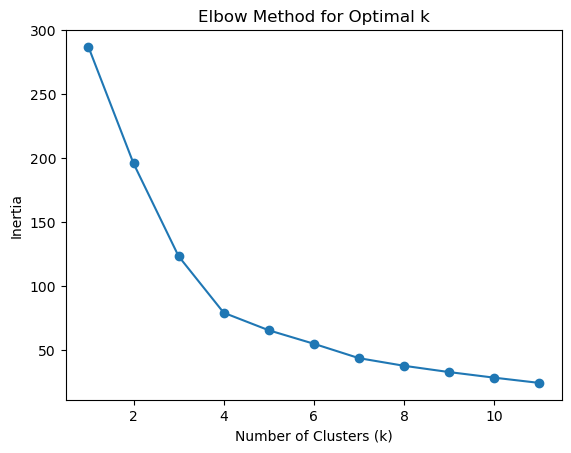

In [65]:
# Plot a line chart with all the inertia values
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 is the best.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [66]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)

In [67]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)

/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [68]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_df)

# View the resulting array of cluster values.
print("Predicted Clusters:", clusters)

Predicted Clusters: [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [69]:
# Create a copy of the DataFrame
data_with_clusters = data.copy()


In [70]:
# Add a new column to the DataFrame with the predicted clusters
data_with_clusters['clusters'] = clusters

# Display sample data
print("DataFrame with Clusters:")
print(data_with_clusters[['price_change_percentage_24h', 'price_change_percentage_7d', 'clusters']].head())

DataFrame with Clusters:
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              clusters  
coin_id                 
bitcoin              0  
ethereum             0  
tether               2  
ripple               2  
bitcoin-cash         0  


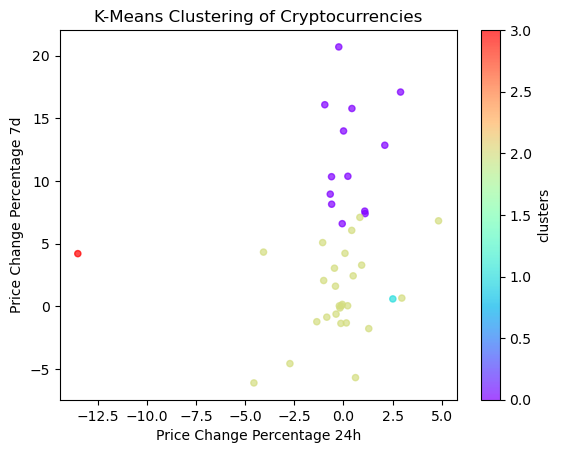

In [71]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
data_with_clusters.plot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', c='clusters', colormap='rainbow', alpha=0.7)
plt.xlabel('Price Change Percentage 24h')
plt.ylabel('Price Change Percentage 7d')
plt.title('K-Means Clustering of Cryptocurrencies')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [72]:
# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)


In [73]:
# Use the PCA model with fit_transform on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame.
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)
print("First five rows of the PCA DataFrame:")
print(pca_df.head())

First five rows of the PCA DataFrame:
                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [74]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance for Each Principal Component:")
print(explained_variance)

Explained Variance for Each Principal Component:
[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  0.89503166

In [75]:
# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)

# Copy the crypto names from the original data
crypto_names_pca = scaled_df.index

# Set the 'coin_id' column as the index
pca_df['coin_id'] = crypto_names_pca
pca_df.set_index('coin_id', inplace=True)

# Display sample data
print("Sample PCA DataFrame:")
print(pca_df.head())

Sample PCA DataFrame:
                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [76]:
# Create a list with the number of k-values to try
k_values_pca = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values_pca:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using PCA DataFrame.
    kmeans_pca.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_pca.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k_values': k_values_pca, 'inertia_values': inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
print("Elbow Data (PCA):")
print(elbow_df_pca)


Elbow Data (PCA):
    k_values  inertia_values
0          1      256.874086
1          2      165.901994
2          3       93.774626
3          4       49.665497
4          5       37.839466
5          6       30.777746
6          7       21.134056
7          8       17.091637
8          9       13.681140
9         10       10.630648
10        11        8.128620


/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

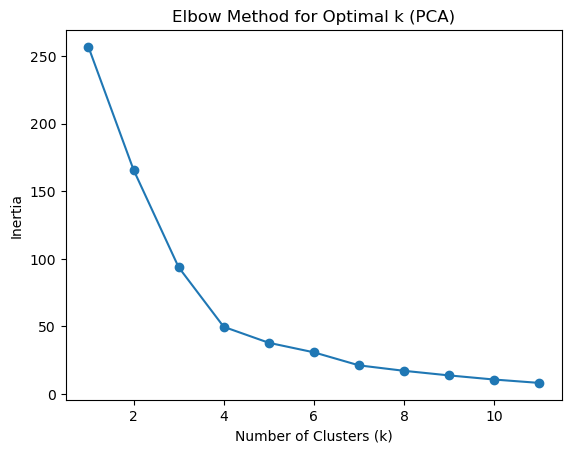

In [77]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df_pca['k_values'], elbow_df_pca['inertia_values'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA)')
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [78]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42)


In [79]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)


/Users/ryancharouf/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [80]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values
print("Predicted Clusters (PCA):", clusters_pca)


Predicted Clusters (PCA): [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [81]:
# Create a copy of the DataFrame with the PCA data
pca_data_with_clusters = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_with_clusters['predicted_clusters'] = clusters_pca

# Display sample data
print("Sample PCA DataFrame with Predicted Clusters:")
print(pca_data_with_clusters.head())

Sample PCA DataFrame with Predicted Clusters:
                   PC1       PC2       PC3  predicted_clusters
coin_id                                                       
bitcoin      -0.600667  0.842760  0.461595                   0
ethereum     -0.458261  0.458466  0.952877                   0
tether       -0.433070 -0.168126 -0.641752                   2
ripple       -0.471835 -0.222660 -0.479053                   2
bitcoin-cash -1.157800  2.041209  1.859715                   0


In [83]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_data_with_clusters.hvplot.scatter(x='PC1', y='PC2', c='predicted_clusters', cmap='viridis', alpha=0.7, hover_cols=['coin_id'])

:Scatter   [PC1]   (PC2,predicted_clusters,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [84]:
# Use the columns from the original scaled DataFrame as the index.
weights_df = pd.DataFrame(pca.components_, columns=scaled_df.columns, index=['PC1', 'PC2', 'PC3'])

# Display the DataFrame showing the weights
print("Weights of Each Feature for Each Principal Component:")
print(weights_df)

Weights of Each Feature for Each Principal Component:
     price_change_percentage_24h  price_change_percentage_7d  \
PC1                    -0.416728                   -0.102432   
PC2                     0.358162                    0.227432   
PC3                    -0.218795                    0.787670   

     price_change_percentage_14d  price_change_percentage_30d  \
PC1                    -0.009162                     0.191523   
PC2                     0.540415                     0.562182   
PC3                     0.349534                    -0.181744   

     price_change_percentage_60d  price_change_percentage_200d  \
PC1                     0.320365                      0.594468   
PC2                     0.434040                      0.027735   
PC3                    -0.361377                      0.039733   

     price_change_percentage_1y  
PC1                    0.568379  
PC2                   -0.150789  
PC3                    0.210541  


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

PC1: Principal Component 1 (PC1):

Strong Negative Influence:
price_change_percentage_24h
price_change_percentage_7d
price_change_percentage_200d
price_change_percentage_1y

Strong Positive Influence:
price_change_percentage_60d
price_change_percentage_30d
price_change_percentage_14d

---------------------------------

Principal Component 2 (PC2):

Strong Negative Influence:
price_change_percentage_30d
price_change_percentage_14d

Strong Positive Influence:
price_change_percentage_7d
price_change_percentage_60d
price_change_percentage_200d
price_change_percentage_1y

---------------------------------

Principal Component 3 (PC3):

Strong Negative Influence:
price_change_percentage_7d
price_change_percentage_14d
price_change_percentage_30d
price_change_percentage_60d
price_change_percentage_1y

Strong Positive Influence:
price_change_percentage_200d
    